In [1]:
!python --version

Python 3.12.4


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "figure.figsize" : (10,10),
          "axes.titlecolor" : 'w',
          "axes.facecolor" : 'w',
          "figure.facecolor" : 'k'}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline


In [3]:
image_size = (128,128)
batch_size = 32

In [4]:
train_ds = image_dataset_from_directory(r'C:\Users\Rajat Dhanure\Downloads\MODEL3\train',
                                           subset='training',
                                           image_size=image_size,
                                           labels='inferred',
                                           validation_split=.2,
                                           seed=10,
                                           label_mode='categorical',
                                           color_mode='grayscale',
                                           batch_size=batch_size)

val_ds = image_dataset_from_directory(r'C:\Users\Rajat Dhanure\Downloads\MODEL3\test',
                                           subset='validation',
                                           image_size=image_size,
                                           labels='inferred',
                                           validation_split=.2,
                                           seed=10,
                                           label_mode='categorical',
                                           color_mode='grayscale',
                                           batch_size=batch_size)

Found 1924 files belonging to 5 classes.
Using 1540 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


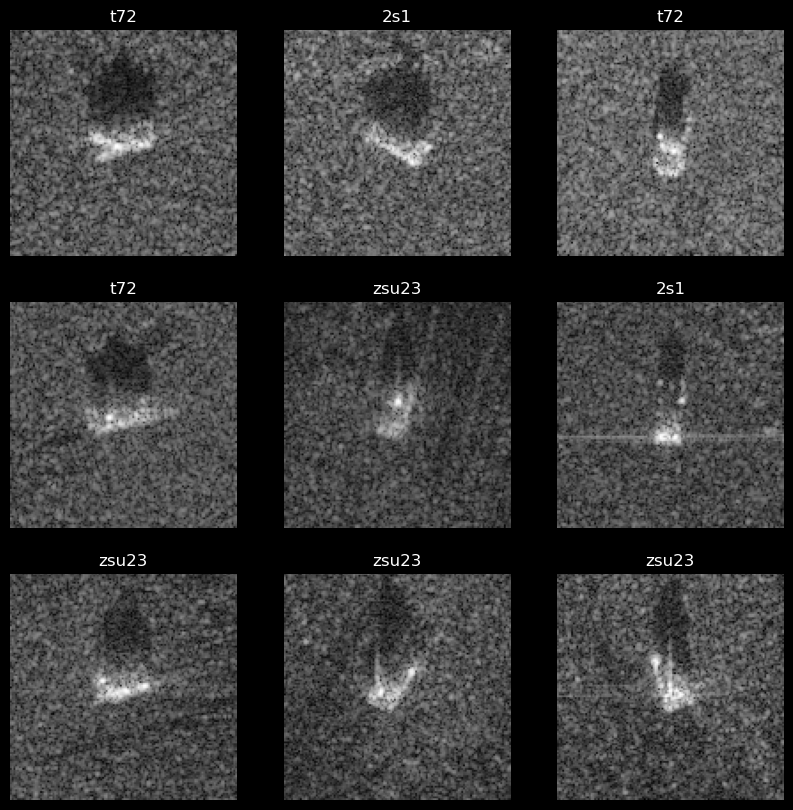

In [5]:
class_names = train_ds.class_names
with plt.rc_context(params):
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
      plt.title(class_names[np.argmax(labels[i])], )
      plt.axis("off")

In [6]:
class_names

['2s1', 'bmp2', 'btr70', 't72', 'zsu23']

In [7]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(3)
val_ds = val_ds.skip(3)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

Number of validation batches: 1
Number of test batches: 3


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes=5

metrics = [
      keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'),
]

In [10]:
model2 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(image_size + (1,))),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])
model2.summary()

C:\Users\Rajat Dhanure\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,405 (3.14 MB)

 Trainable params: 822,405 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=metrics)


In [12]:
history2 = model2.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 192ms/step - auc: 0.5653 - categorical_accuracy: 0.2607 - loss: 1.5852 - prc: 0.2575 - val_auc: 0.6484 - val_categorical_accuracy: 0.2500 - val_loss: 1.4381 - val_prc: 0.2430
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - auc: 0.7954 - categorical_accuracy: 0.4505 - loss: 1.1923 - prc: 0.5425 - val_auc: 0.7969 - val_categorical_accuracy: 0.5000 - val_loss: 1.1994 - val_prc: 0.6591
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - auc: 0.8947 - categorical_accuracy: 0.6032 - loss: 0.9061 - prc: 0.7283 - val_auc: 0.6719 - val_categorical_accuracy: 0.2500 - val_loss: 1.5158 - val_prc: 0.2711
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - auc: 0.9297 - categorical_accuracy: 0.6853 - loss: 0.7621 - prc: 0.8019 - val_auc: 0.6562 - val_categorical_accuracy: 0.5000 - val_loss: 1.5191 - val_prc: 0.2835
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - auc: 0.9527 - categorical_accuracy: 0.7726 - loss: 0.6473 - prc: 0.8624 - val_auc

In [13]:
results = model2.evaluate(test_ds, verbose=0)
print(results)
print(f"Test Accuracy: {np.round(results[1] * 100,2)}%")

[0.12688158452510834, 0.9583333134651184, 0.9978705048561096, 0.9920983910560608]
Test Accuracy: 95.83%


In [14]:
predictions = np.argmax(model2.predict(test_ds), axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [15]:
def plot_cm(model, data):
    with plt.rc_context(params):
        y_true = []
        y_pred = []
        for x,y in data:
            y= tf.argmax(y,axis=1)
            y_true.append(y)
            y_pred.append(tf.argmax(model.predict(x),axis = 1))
    
        y_pred = tf.concat(y_pred, axis=0)
        y_true = tf.concat(y_true, axis=0)

        cm = confusion_matrix(y_true, y_pred)
        fig = plt.figure(figsize = (10,10))
        ax1 = fig.add_subplot(1,1,1)
        sns.set(font_scale=1.4) #for label size
        sns.heatmap(cm,cmap='binary', annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 10},
            cbar = False);
        ax1.set_ylabel('True Values',fontsize=14)
        ax1.set_xlabel('Predicted Values',fontsize=14)
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


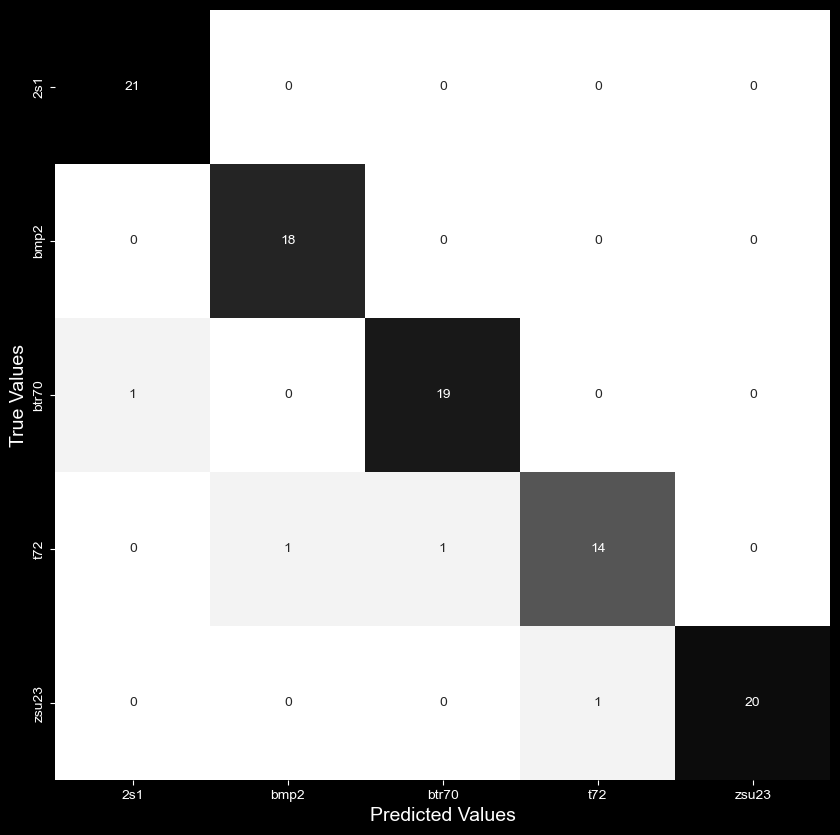

In [17]:
plot_cm(model2, test_ds)

In [16]:
import pandas as pd
data_his = pd.DataFrame(history2.history)
data_his

,auc,categorical_accuracy,loss,prc,val_auc,val_categorical_accuracy,val_loss,val_prc
0,0.640319,0.331169,1.510537,0.352382,0.648438,0.25,1.438106,0.243016
1,0.818020,0.481818,1.137923,0.574762,0.796875,0.50,1.199416,0.659063
2,0.894838,0.610390,0.905719,0.727583,0.671875,0.25,1.515765,0.271065
3,0.929721,0.688961,0.751763,0.805954,0.656250,0.50,1.519125,0.283465
4,0.959073,0.783117,0.592151,0.878343,0.953125,0.75,0.522770,0.884387
5,0.974664,0.834416,0.458521,0.923124,0.968750,0.75,0.474540,0.908839
6,0.991891,0.910390,0.268781,0.972601,0.953125,0.75,0.816968,0.884387
7,0.995933,0.937013,0.184925,0.986204,0.984375,0.75,0.314517,0.944214
8,0.998289,0.967532,0.120770,0.994010,1.000000,1.00,0.128617,1.000000
9,0.999226,0.975325,0.090335,0.997055,0.984375,0.75,0.242450,0.944214


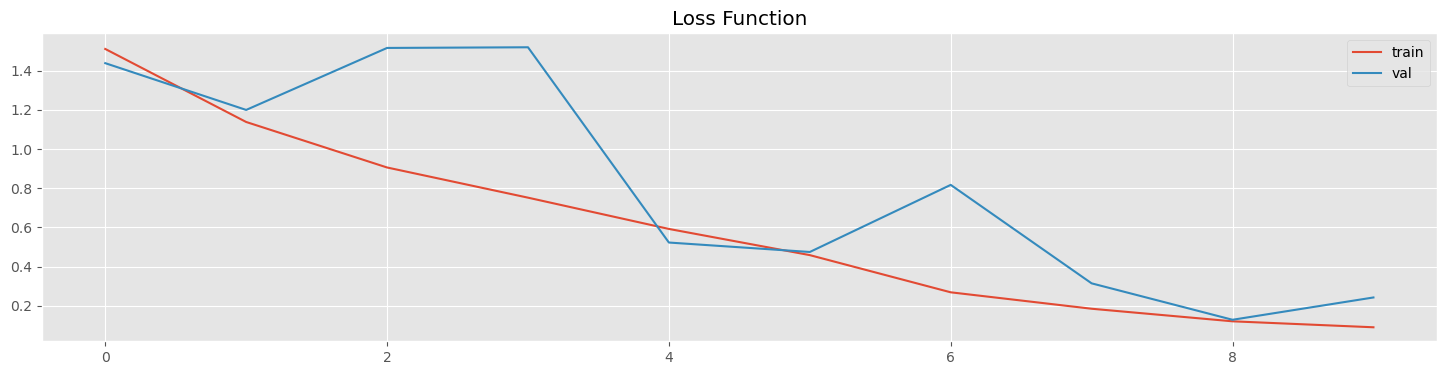

In [17]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

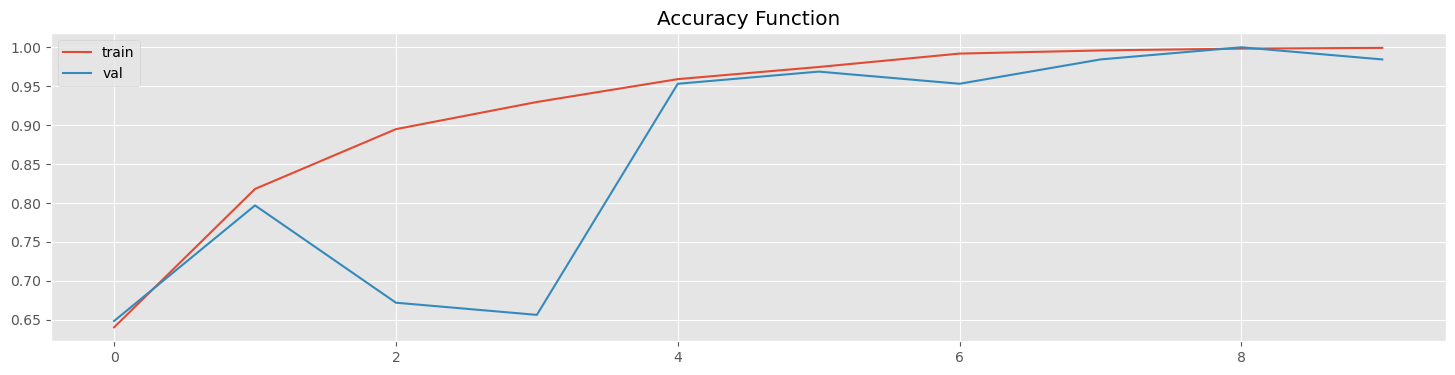

In [18]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['auc'], label = 'train')
plt.plot(data_his['val_auc'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)

In [20]:
model2.save(r"C:\Users\Rajat Dhanure\Downloads\MODEL3\classification_of_sar_images.keras")

In [21]:
from tensorflow.keras.models import load_model
model_path = r"C:\Users\Rajat Dhanure\Downloads\MODEL3\classification_of_sar_images.keras"  
model = load_model(model_path)

C:\Users\Rajat Dhanure\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


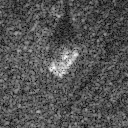

In [25]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()  

file_path = filedialog.askopenfilename(
    title="Select Image",
    filetypes=[("PNG files", "*.png"), ("All files", "*.*")]
)

if file_path:
    image = keras.utils.load_img(
        path=file_path,
        color_mode='grayscale',
        target_size=(128, 128)
    )
    
    image_array = keras.utils.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)

else:
    print("No file selected.")
    
image


In [23]:
def predict_t72(model):
    predictions = model.predict(image_array)
    score = tf.nn.softmax(predictions[0])
    return(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

In [26]:
predict_t72(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'This image most likely belongs to zsu23 with a 40.46 percent confidence.'